## Omicron Variant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set(rc={'figure.figsize':(50,50)})
sns.set_style('whitegrid')

In [3]:
omicron = pd.read_csv('Omicron_CAOnly.txt', delim_whitespace=True)

In [4]:
omicron.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
0,A13,3,1.000000,0.063388,0.000000,0.000047,33,8.000
1,A14,6,0.600000,0.065167,0.000950,0.000102,33,8.000
2,A15,8,0.428571,0.065186,0.001694,0.000129,33,7.625
3,A16,6,0.466667,0.068335,0.008860,0.000084,32,7.500
4,A17,5,0.500000,0.068286,0.003318,0.000053,32,6.400


In [5]:
omicron.dtypes

Node                        object
Degree                       int64
Cluster_Coeff              float64
Closeness                  float64
Betweenness                float64
Eigenvector_centrality     float64
Eccentricity                 int64
Average_neighbor_degree    float64
dtype: object

In [6]:
omicron['Node'] = omicron['Node'].astype('str').str[1:]
omicron['Node'] = omicron['Node'].astype('int64')
omicron.index = omicron['Node']

In [7]:
omicron.head()

,Node,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,,
13,13,3,1.000000,0.063388,0.000000,0.000047,33,8.000
14,14,6,0.600000,0.065167,0.000950,0.000102,33,8.000
15,15,8,0.428571,0.065186,0.001694,0.000129,33,7.625
16,16,6,0.466667,0.068335,0.008860,0.000084,32,7.500
17,17,5,0.500000,0.068286,0.003318,0.000053,32,6.400


In [8]:
omicron = omicron.drop(columns=['Node'], axis=1)

In [9]:
omicron.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
13,3,1.000000,0.063388,0.000000,0.000047,33,8.000
14,6,0.600000,0.065167,0.000950,0.000102,33,8.000
15,8,0.428571,0.065186,0.001694,0.000129,33,7.625
16,6,0.466667,0.068335,0.008860,0.000084,32,7.500
17,5,0.500000,0.068286,0.003318,0.000053,32,6.400


In [10]:
scaler = MinMaxScaler()
cols_scaled = omicron.columns.to_list()
cols_scaled.remove

<function list.remove(value, /)>

In [11]:
data2scaled = pd.DataFrame(scaler.fit_transform(omicron), columns=cols_scaled)

In [12]:
data2scaled.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
0,0.083333,1.000000,0.225322,0.000000,0.000046,0.941176,0.572917
1,0.333333,0.500000,0.254708,0.000950,0.000101,0.941176,0.572917
2,0.500000,0.285714,0.255021,0.001694,0.000128,0.941176,0.529948
3,0.333333,0.333334,0.307037,0.008860,0.000083,0.882353,0.515625
4,0.250000,0.375000,0.306227,0.003318,0.000052,0.882353,0.389583


In [13]:
data2scaled.index = omicron.index

In [14]:
data2scaled.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
13,0.083333,1.000000,0.225322,0.000000,0.000046,0.941176,0.572917
14,0.333333,0.500000,0.254708,0.000950,0.000101,0.941176,0.572917
15,0.500000,0.285714,0.255021,0.001694,0.000128,0.941176,0.529948
16,0.333333,0.333334,0.307037,0.008860,0.000083,0.882353,0.515625
17,0.250000,0.375000,0.306227,0.003318,0.000052,0.882353,0.389583


In [15]:
omicron2 = data2scaled
omicron2.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
13,0.083333,1.000000,0.225322,0.000000,0.000046,0.941176,0.572917
14,0.333333,0.500000,0.254708,0.000950,0.000101,0.941176,0.572917
15,0.500000,0.285714,0.255021,0.001694,0.000128,0.941176,0.529948
16,0.333333,0.333334,0.307037,0.008860,0.000083,0.882353,0.515625
17,0.250000,0.375000,0.306227,0.003318,0.000052,0.882353,0.389583


In [16]:
omicron2.describe()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,0.451493,0.415921,0.504577,0.043688,0.045980,0.548376,0.557371
std,0.199156,0.172696,0.220448,0.113034,0.144341,0.241374,0.170847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.305555,0.326024,0.002949,0.000189,0.352941,0.458333
50%,0.416667,0.375000,0.502412,0.011545,0.000633,0.588235,0.587240
75%,0.583333,0.500000,0.671589,0.032217,0.006260,0.764706,0.677083
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


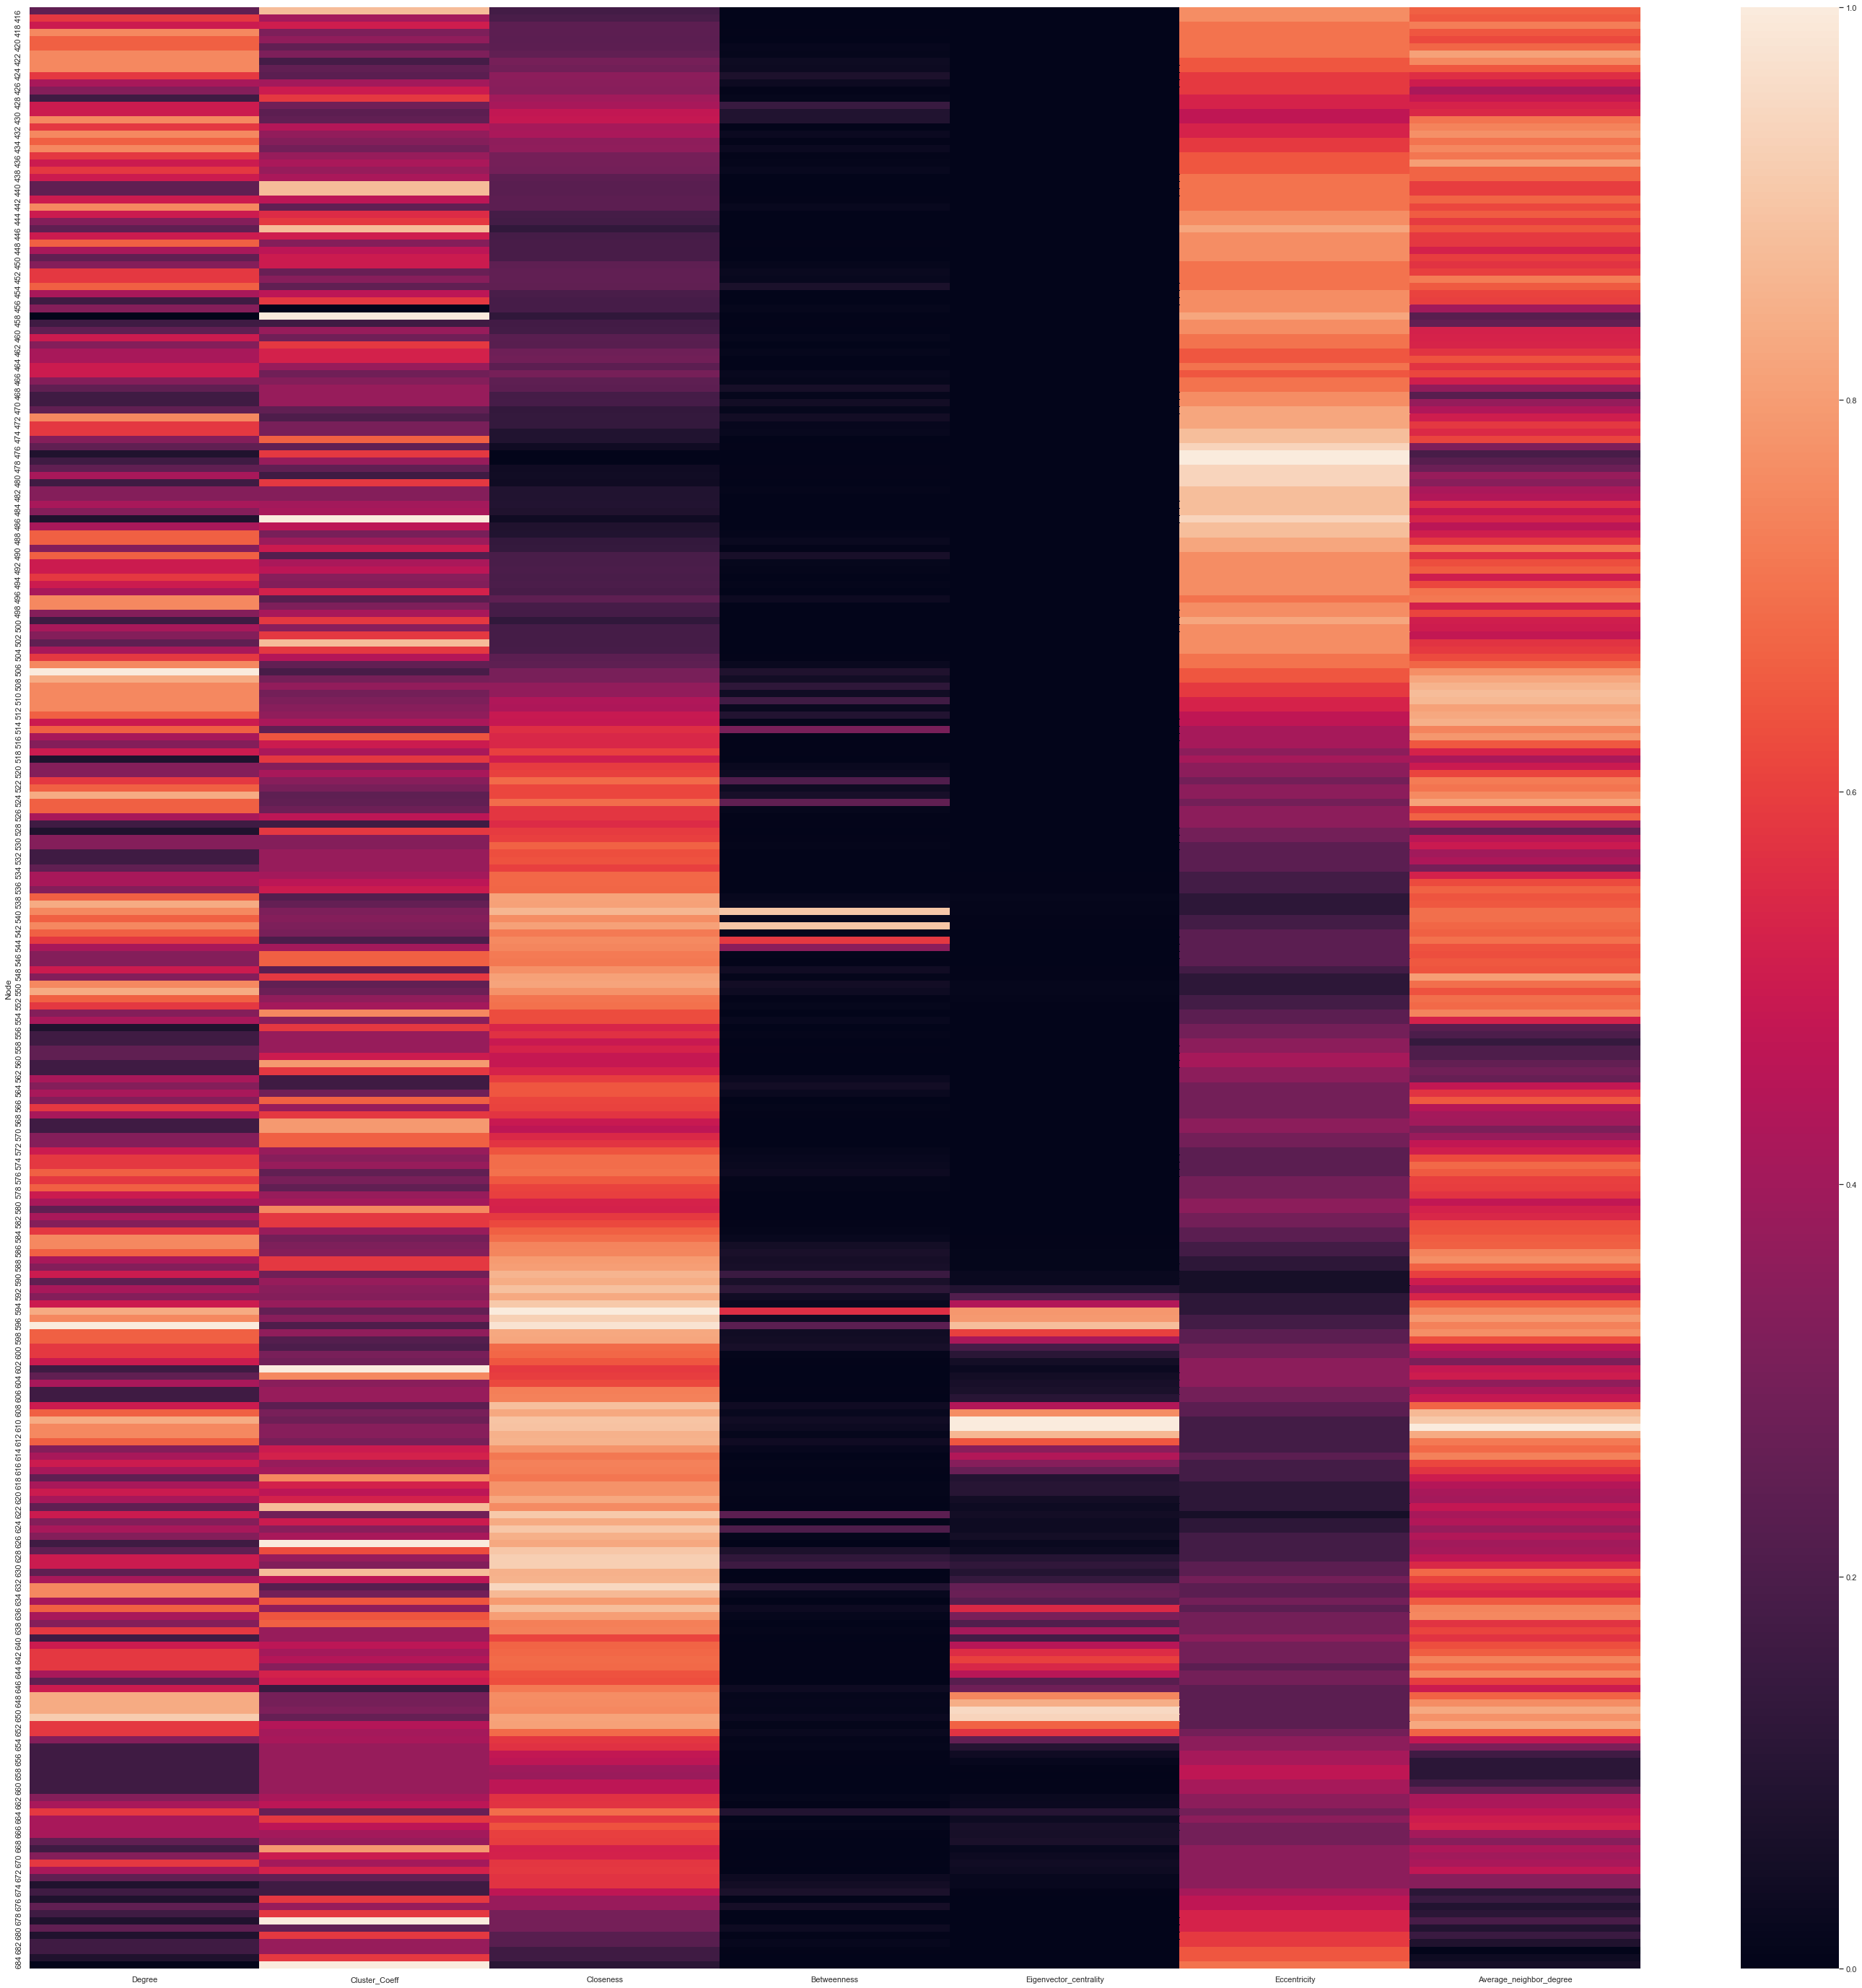

In [17]:
hm = sns.heatmap(omicron2.iloc[400:800])
figure = hm.get_figure()
figure.savefig('heatmap_omicron_scaled.png', dpi=400)

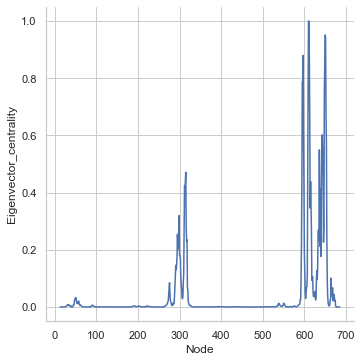

In [18]:
sns.relplot(x='Node', y='Eigenvector_centrality',kind='line', data=omicron2)

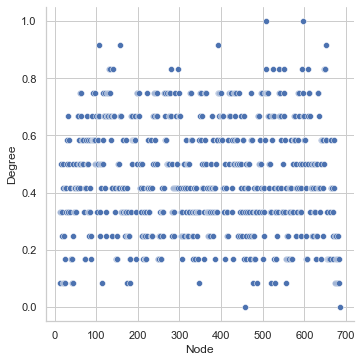

In [19]:
sns.relplot(x='Node', y='Degree', data=omicron2)

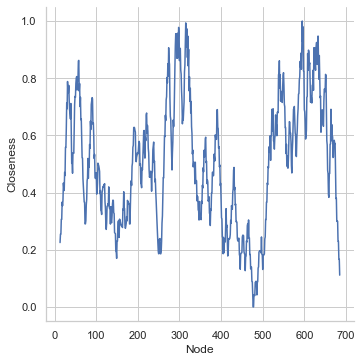

In [20]:
sns.relplot(x='Node', y='Closeness',kind='line', data=omicron2)

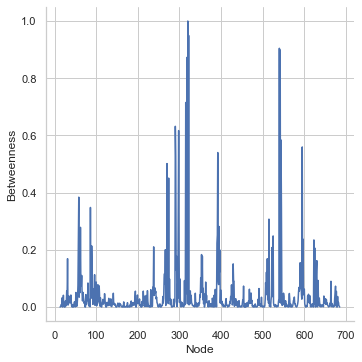

In [21]:
sns.relplot(x='Node', y='Betweenness',kind='line', data=omicron2)

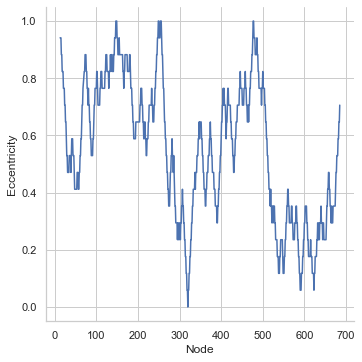

In [22]:
sns.relplot(x='Node', y='Eccentricity',kind='line', data=omicron2)

In [23]:
omicron2_crop = omicron2.iloc[400:800]
for col in ['Degree', 'Cluster_Coeff', 'Closeness', 'Betweenness', 'Eigenvector_centrality', 'Eccentricity']:
    print(f'TOP 5 Values in {col}:')
    print(omicron2_crop.nlargest(10, col))
    print(f'BOTTOM 5 Values in {col}:')
    print(omicron2_crop.nsmallest(5, col))
    print("----------------------------------------------")

TOP 5 Values in Degree:
        Degree  Cluster_Coeff  Closeness  Betweenness  Eigenvector_centrality  \
Node                                                                            
507   1.000000       0.189560   0.305880     0.085224                0.000944   
597   1.000000       0.203296   0.979501     0.237126                0.879645   
651   0.916667       0.262820   0.813462     0.029218                0.940178   
508   0.833333       0.299242   0.305765     0.049537                0.001037   
524   0.833333       0.242424   0.615461     0.063685                0.001051   
539   0.833333       0.261364   0.812488     0.029187                0.011475   
551   0.833333       0.280303   0.774480     0.037406                0.013000   
595   0.833333       0.261364   1.000000     0.559622                0.786945   
610   0.833333       0.280303   0.898216     0.044612                1.000000   
648   0.833333       0.299242   0.761909     0.013948                0.749883   

   

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(omicron2)

PCA(n_components=2)

In [25]:
pca.components_

array([[ 0.26585175, -0.11887555,  0.61502727,  0.14463398,  0.23883917,
        -0.64485412,  0.2076847 ],
       [-0.68067443,  0.43332684,  0.17280997, -0.06658776, -0.02102929,
        -0.35745485, -0.4317369 ]])

In [26]:
pca.explained_variance_ratio_

array([0.46736954, 0.25892821])

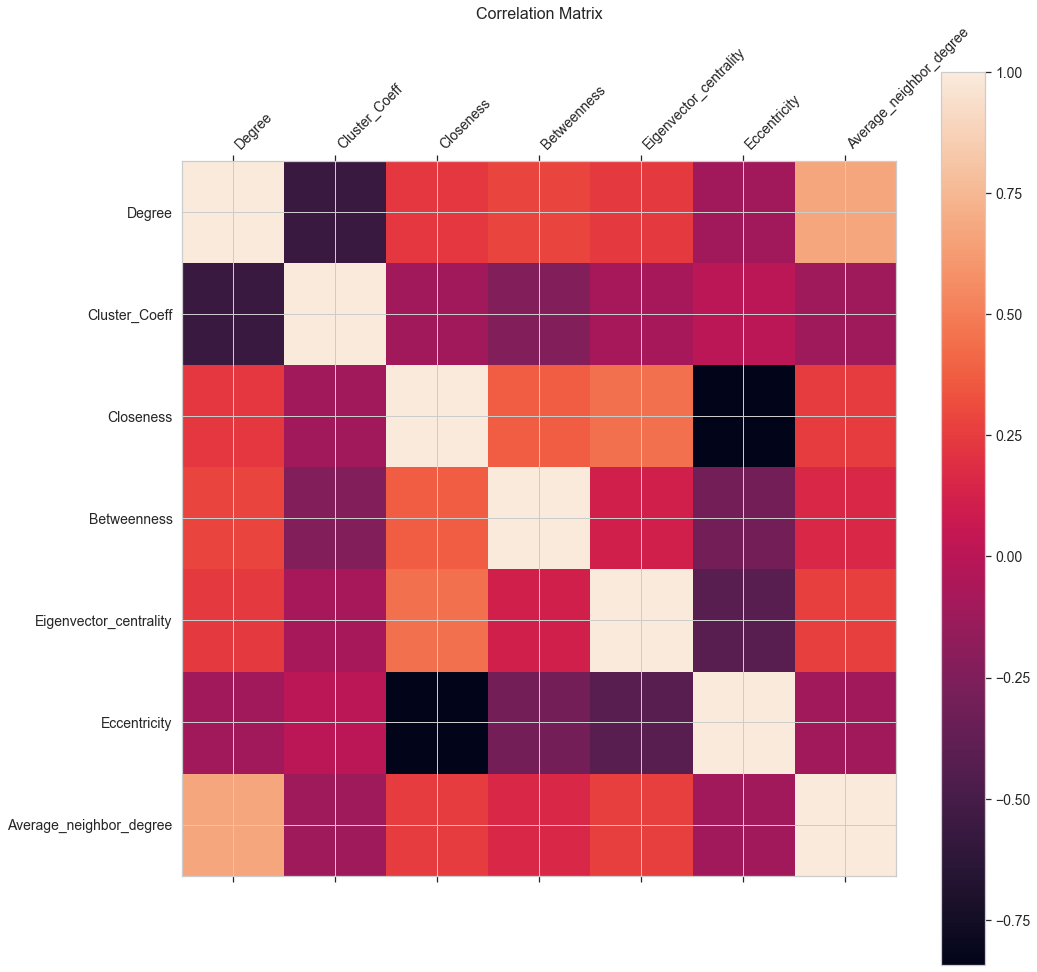

In [27]:
import matplotlib.pyplot as plt
df = omicron2
plt.matshow(df.corr())
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45, ha='left')
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Omicron vs Wuhan

In [28]:
data2 = pd.read_csv('vasan_CAonly_Cchain.txt', delim_whitespace=True)
data2['Node'] = data2['Node'].astype('str').str[1:]
data2['Node'] = data2['Node'].astype('int64')
data2.index = data2['Node']
data2 = data2.drop(columns=['Node'], axis=1)
scaler = MinMaxScaler()
data2scaled = pd.DataFrame(scaler.fit_transform(data2), columns=cols_scaled)
wuhan2 = data2scaled
wuhan2.index = data2.index
wuhan2.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
27,0.272727,0.640000,0.496371,0.000156,0.0,0.48,0.559763
28,0.363636,0.679999,0.554247,0.001161,0.0,0.44,0.650888
29,0.545455,0.400000,0.625010,0.031677,0.0,0.40,0.602071
30,0.454545,0.600000,0.620258,0.000295,0.0,0.40,0.660186
31,0.727273,0.386667,0.696857,0.116040,0.0,0.36,0.611834


In [29]:
corrs = wuhan2.corrwith(omicron2, axis=1)

<AxesSubplot:ylabel='Node'>

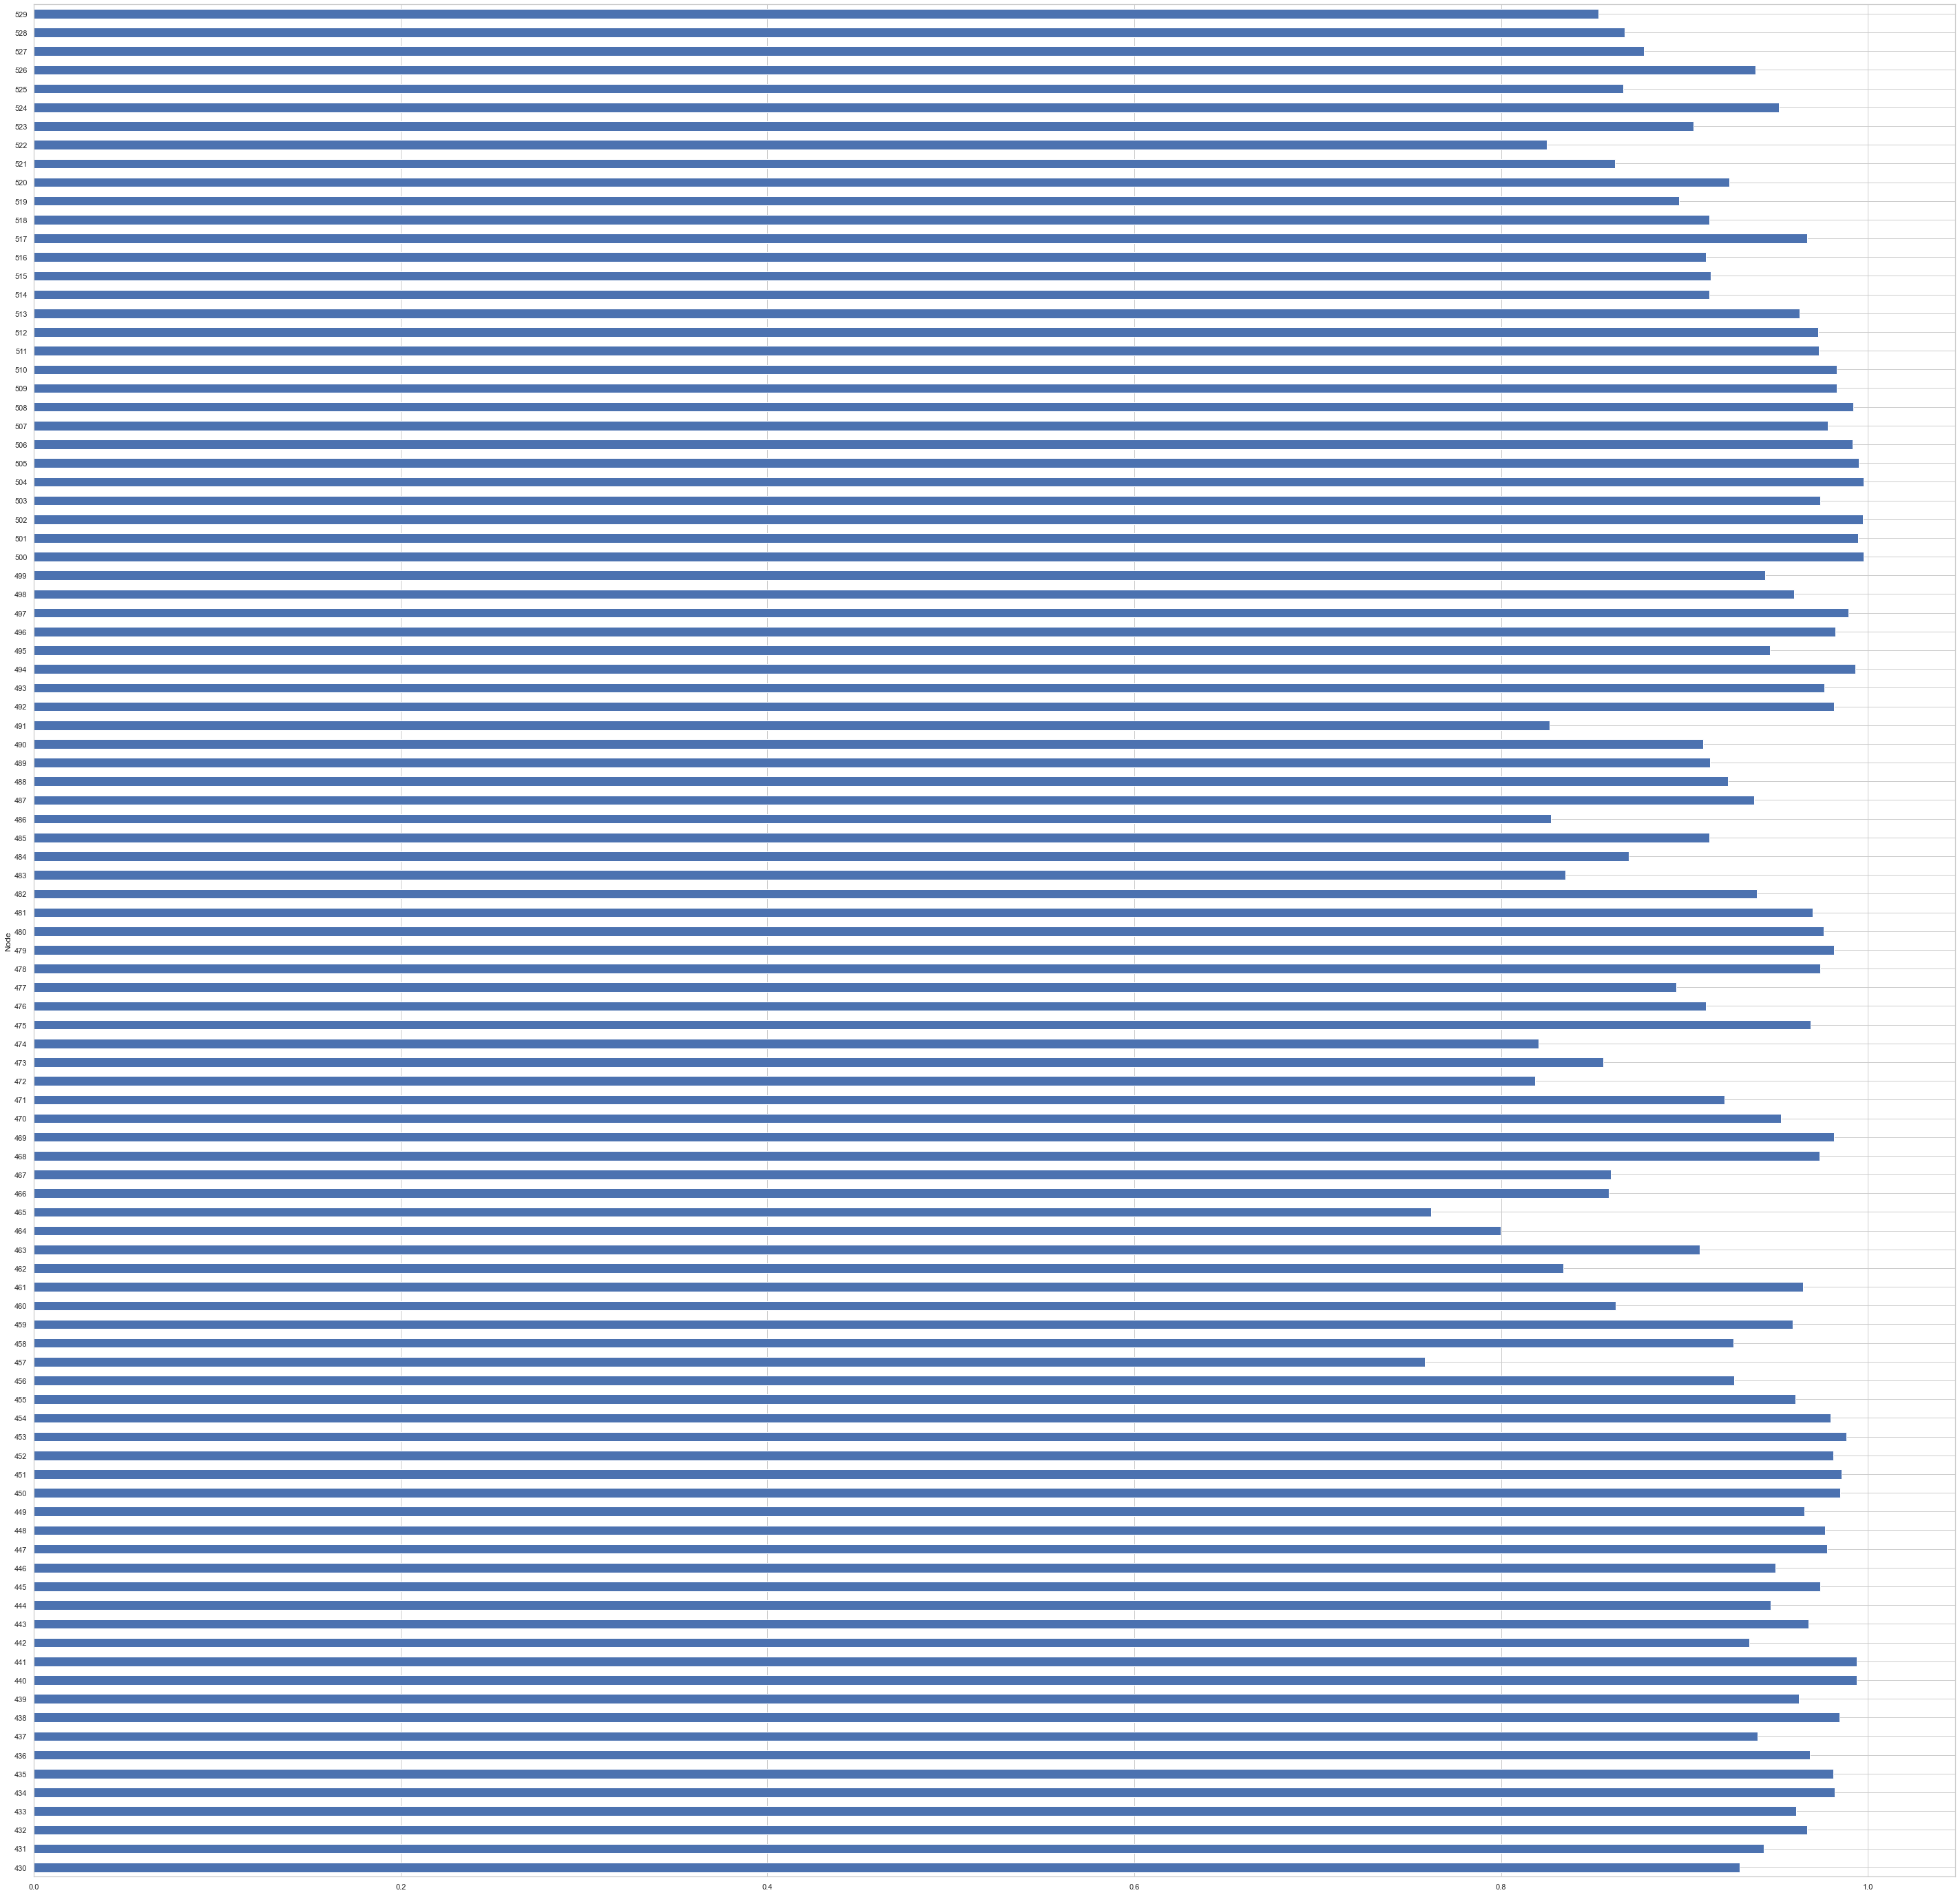

In [30]:
corrs.iloc[400:500].plot(kind='barh')

<AxesSubplot:ylabel='Node'>

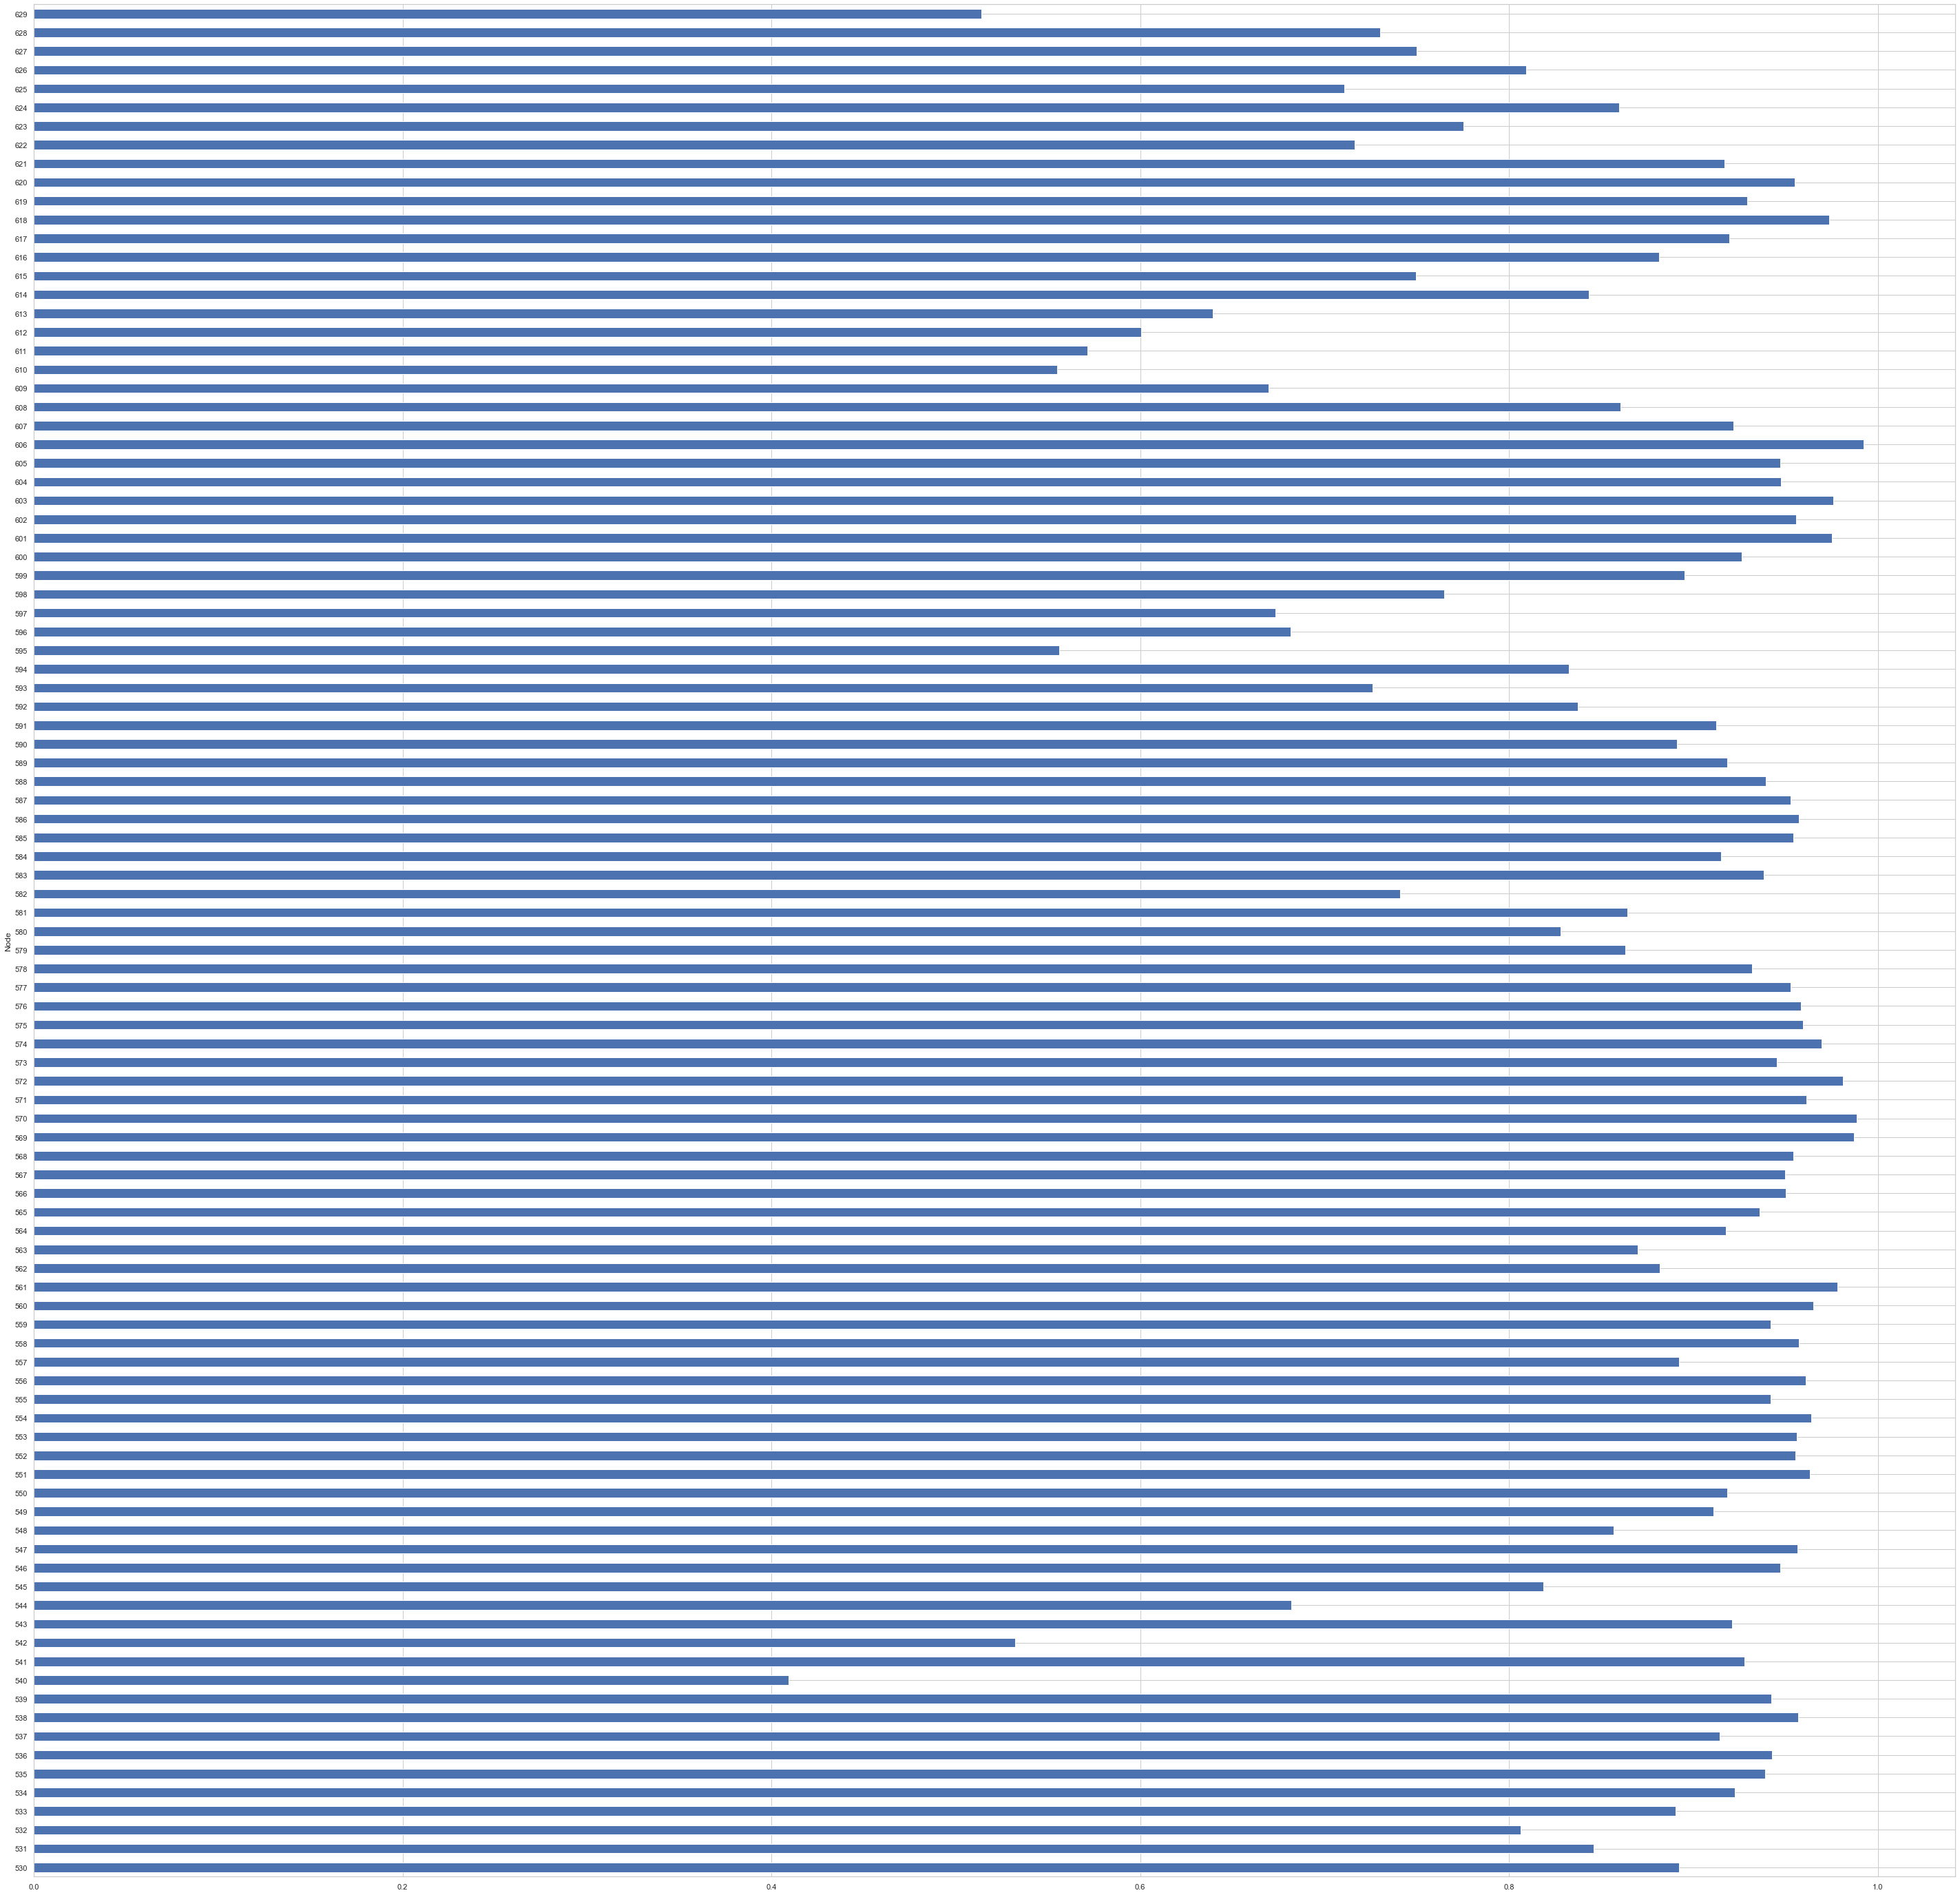

In [31]:
corrs.iloc[500:600].plot(kind='barh')

<AxesSubplot:ylabel='Node'>

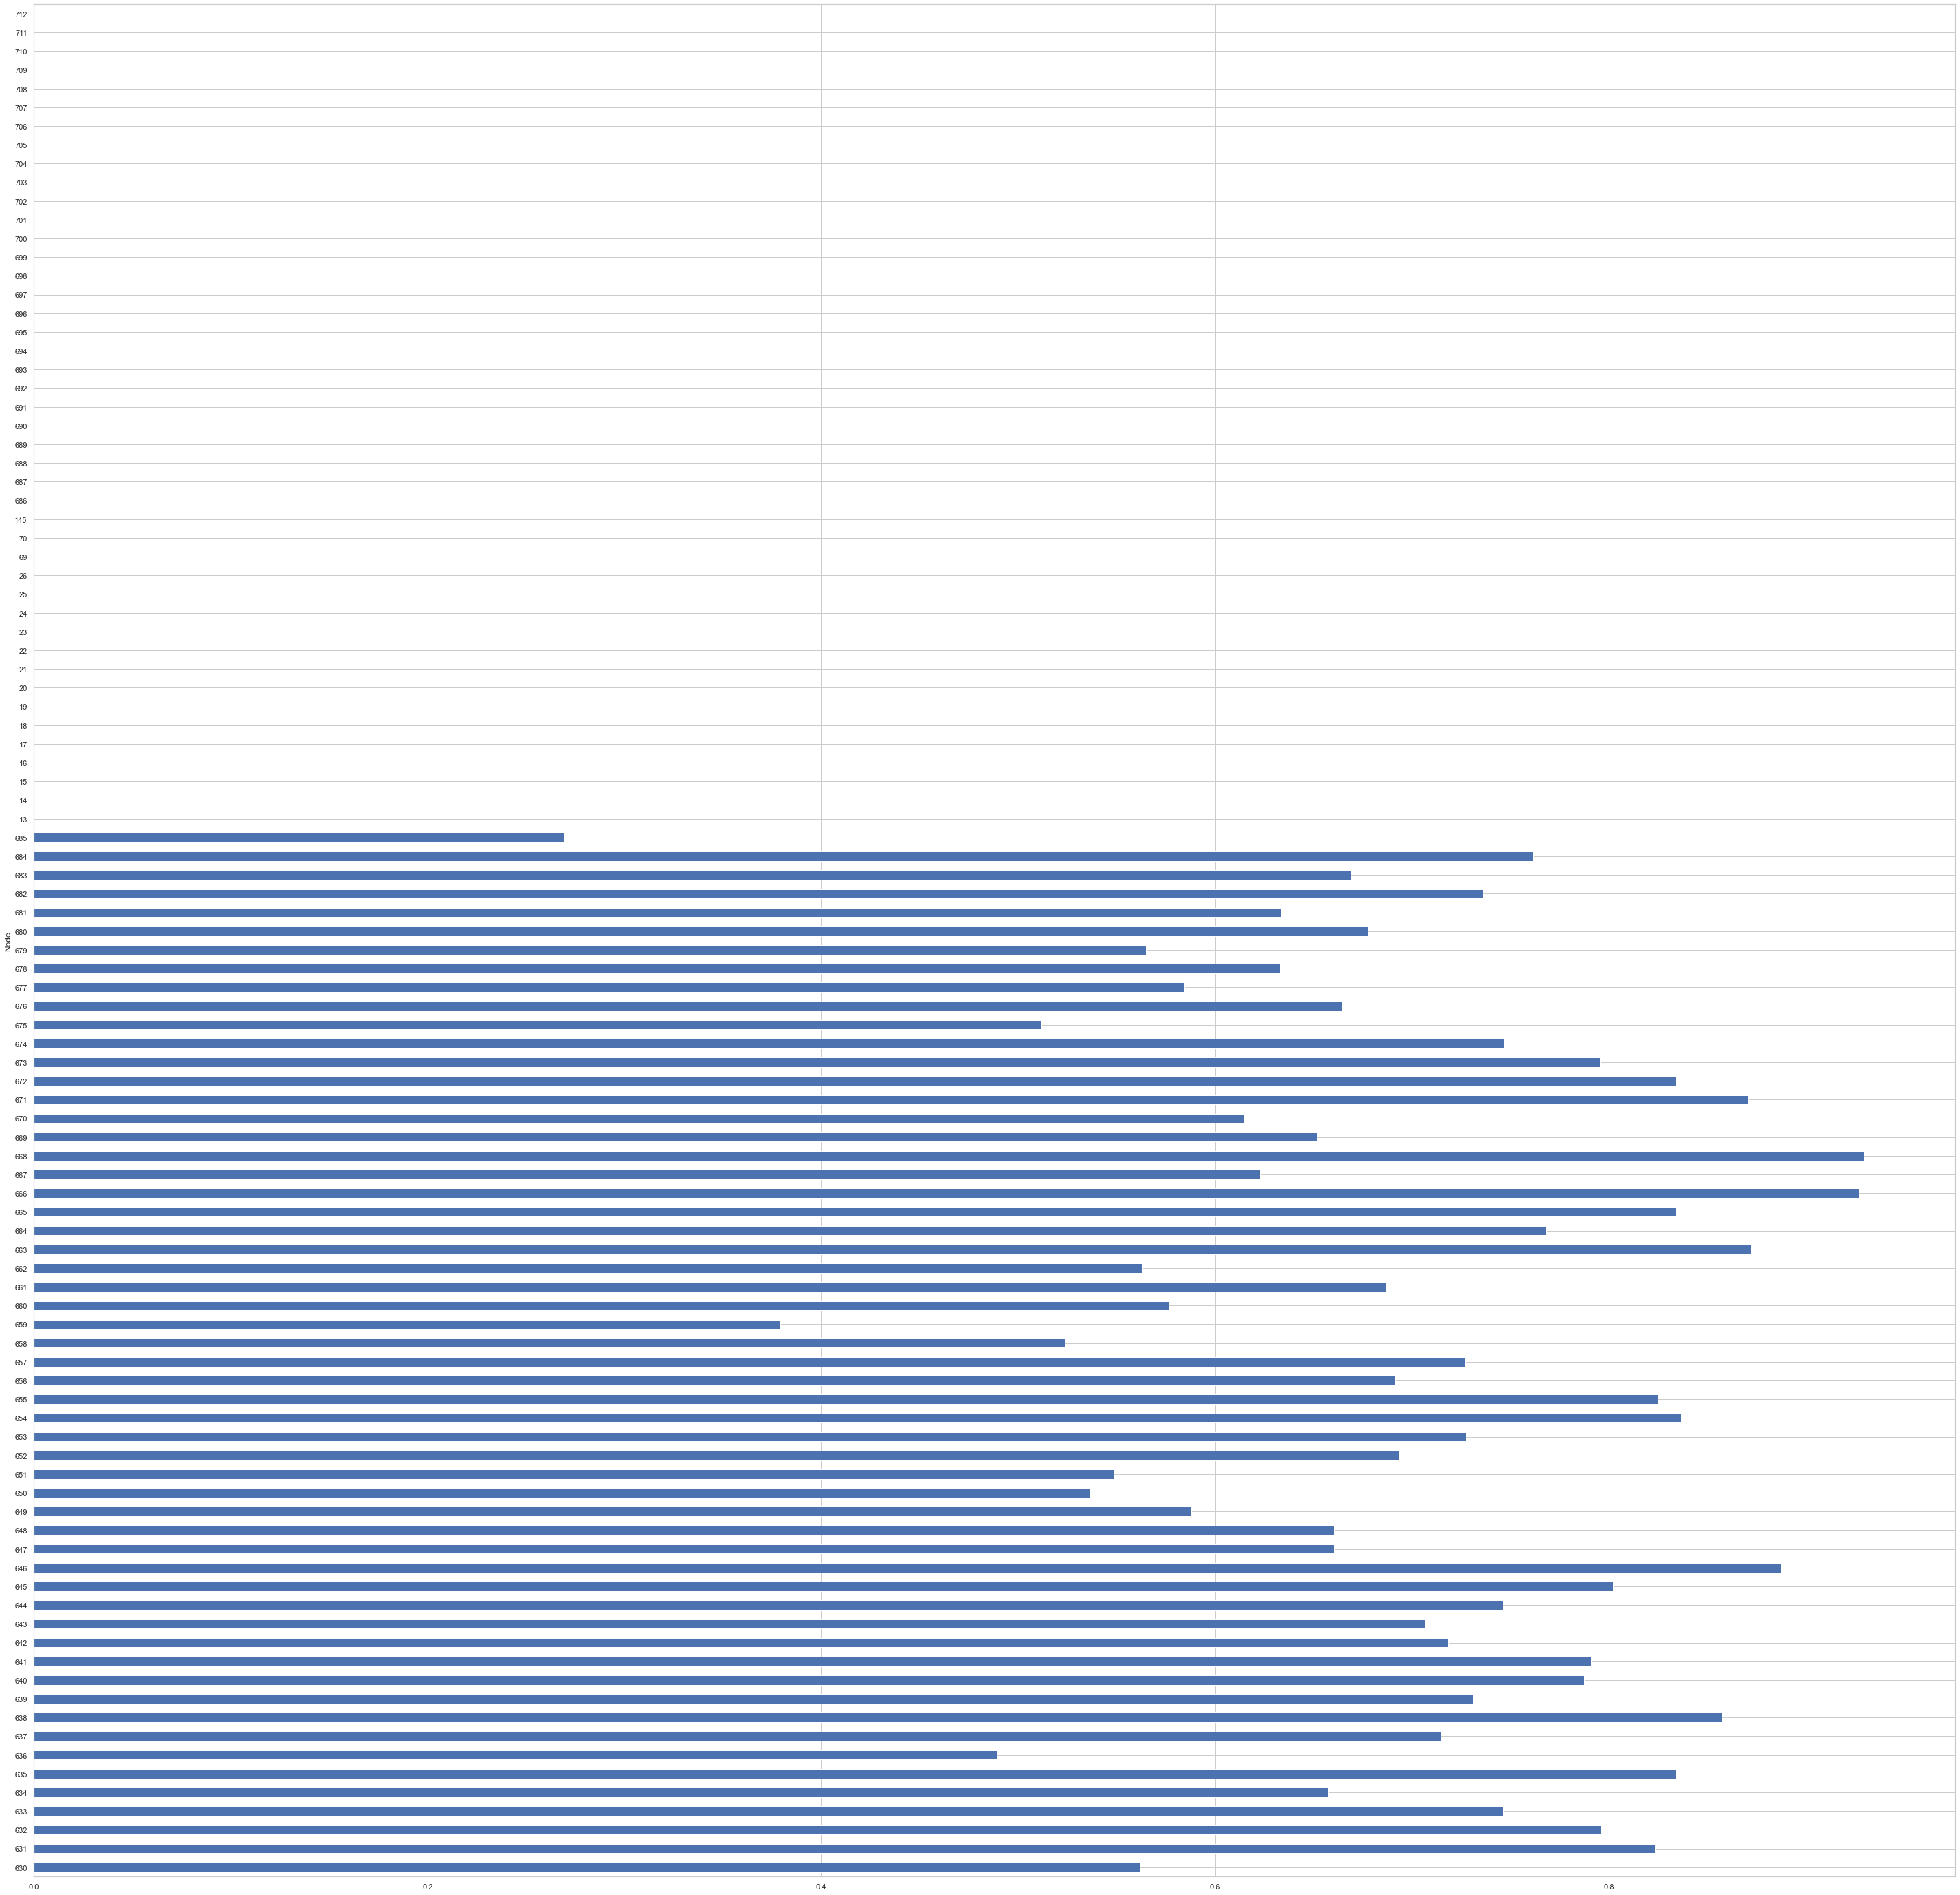

In [32]:
corrs.iloc[600:700].plot(kind='barh')

In [33]:
corrs.nlargest(20)

Node
504    0.997739
405    0.997601
500    0.997485
502    0.997319
52     0.996580
167    0.995768
53     0.995630
403    0.995325
505    0.995063
406    0.994674
501    0.994629
407    0.994267
440    0.993929
441    0.993929
494    0.993142
408    0.992928
606    0.992388
401    0.992098
415    0.992086
508    0.991930
dtype: float64

In [34]:
corrs.nsmallest(10)

Node
685    0.269310
220    0.297098
320    0.368535
318    0.373145
659    0.379242
540    0.409301
322    0.415993
636    0.489194
196    0.503552
675    0.511772
dtype: float64

## Omicron vs Delta

In [35]:
delta2 = pd.read_csv('Delta_CAonly.txt', delim_whitespace=True)
delta2['Node'] = delta2['Node'].astype('str').str[1:]
delta2['Node'] = delta2['Node'].astype('int64')
delta2.index = delta2['Node']
delta2 = delta2.drop(columns=['Node'], axis=1)
scaler = MinMaxScaler()
delta2scaled = pd.DataFrame(scaler.fit_transform(delta2), columns=cols_scaled)
delta = delta2scaled
delta.index = delta2.index
delta.head()

,Degree,Cluster_Coeff,Closeness,Betweenness,Eigenvector_centrality,Eccentricity,Average_neighbor_degree
Node,,,,,,,
13,0.363636,0.454545,0.236400,0.000757,0.024549,0.933333,0.692466
14,0.545455,0.464286,0.250127,0.002347,0.031705,0.933333,0.630031
15,0.909091,0.152892,0.255021,0.009000,0.048453,0.933333,0.590299
16,0.363636,0.636363,0.251414,0.000680,0.030788,0.933333,0.851393
17,0.545455,0.366882,0.310248,0.002744,0.029509,0.866667,0.544892


In [36]:
corrs2 = delta.corrwith(omicron2, axis = 1)

In [37]:
corrs2.nlargest(10)

Node
685    0.999013
504    0.998101
419    0.998057
350    0.997579
440    0.997108
441    0.997108
505    0.996857
669    0.996818
550    0.996703
603    0.996488
dtype: float64

In [38]:
corrs2.nsmallest(10)

Node
196    0.176437
626    0.297309
308    0.406600
113    0.539608
606    0.583562
205    0.623535
369    0.626224
545    0.628935
679    0.629951
93     0.637617
dtype: float64

<AxesSubplot:ylabel='Node'>

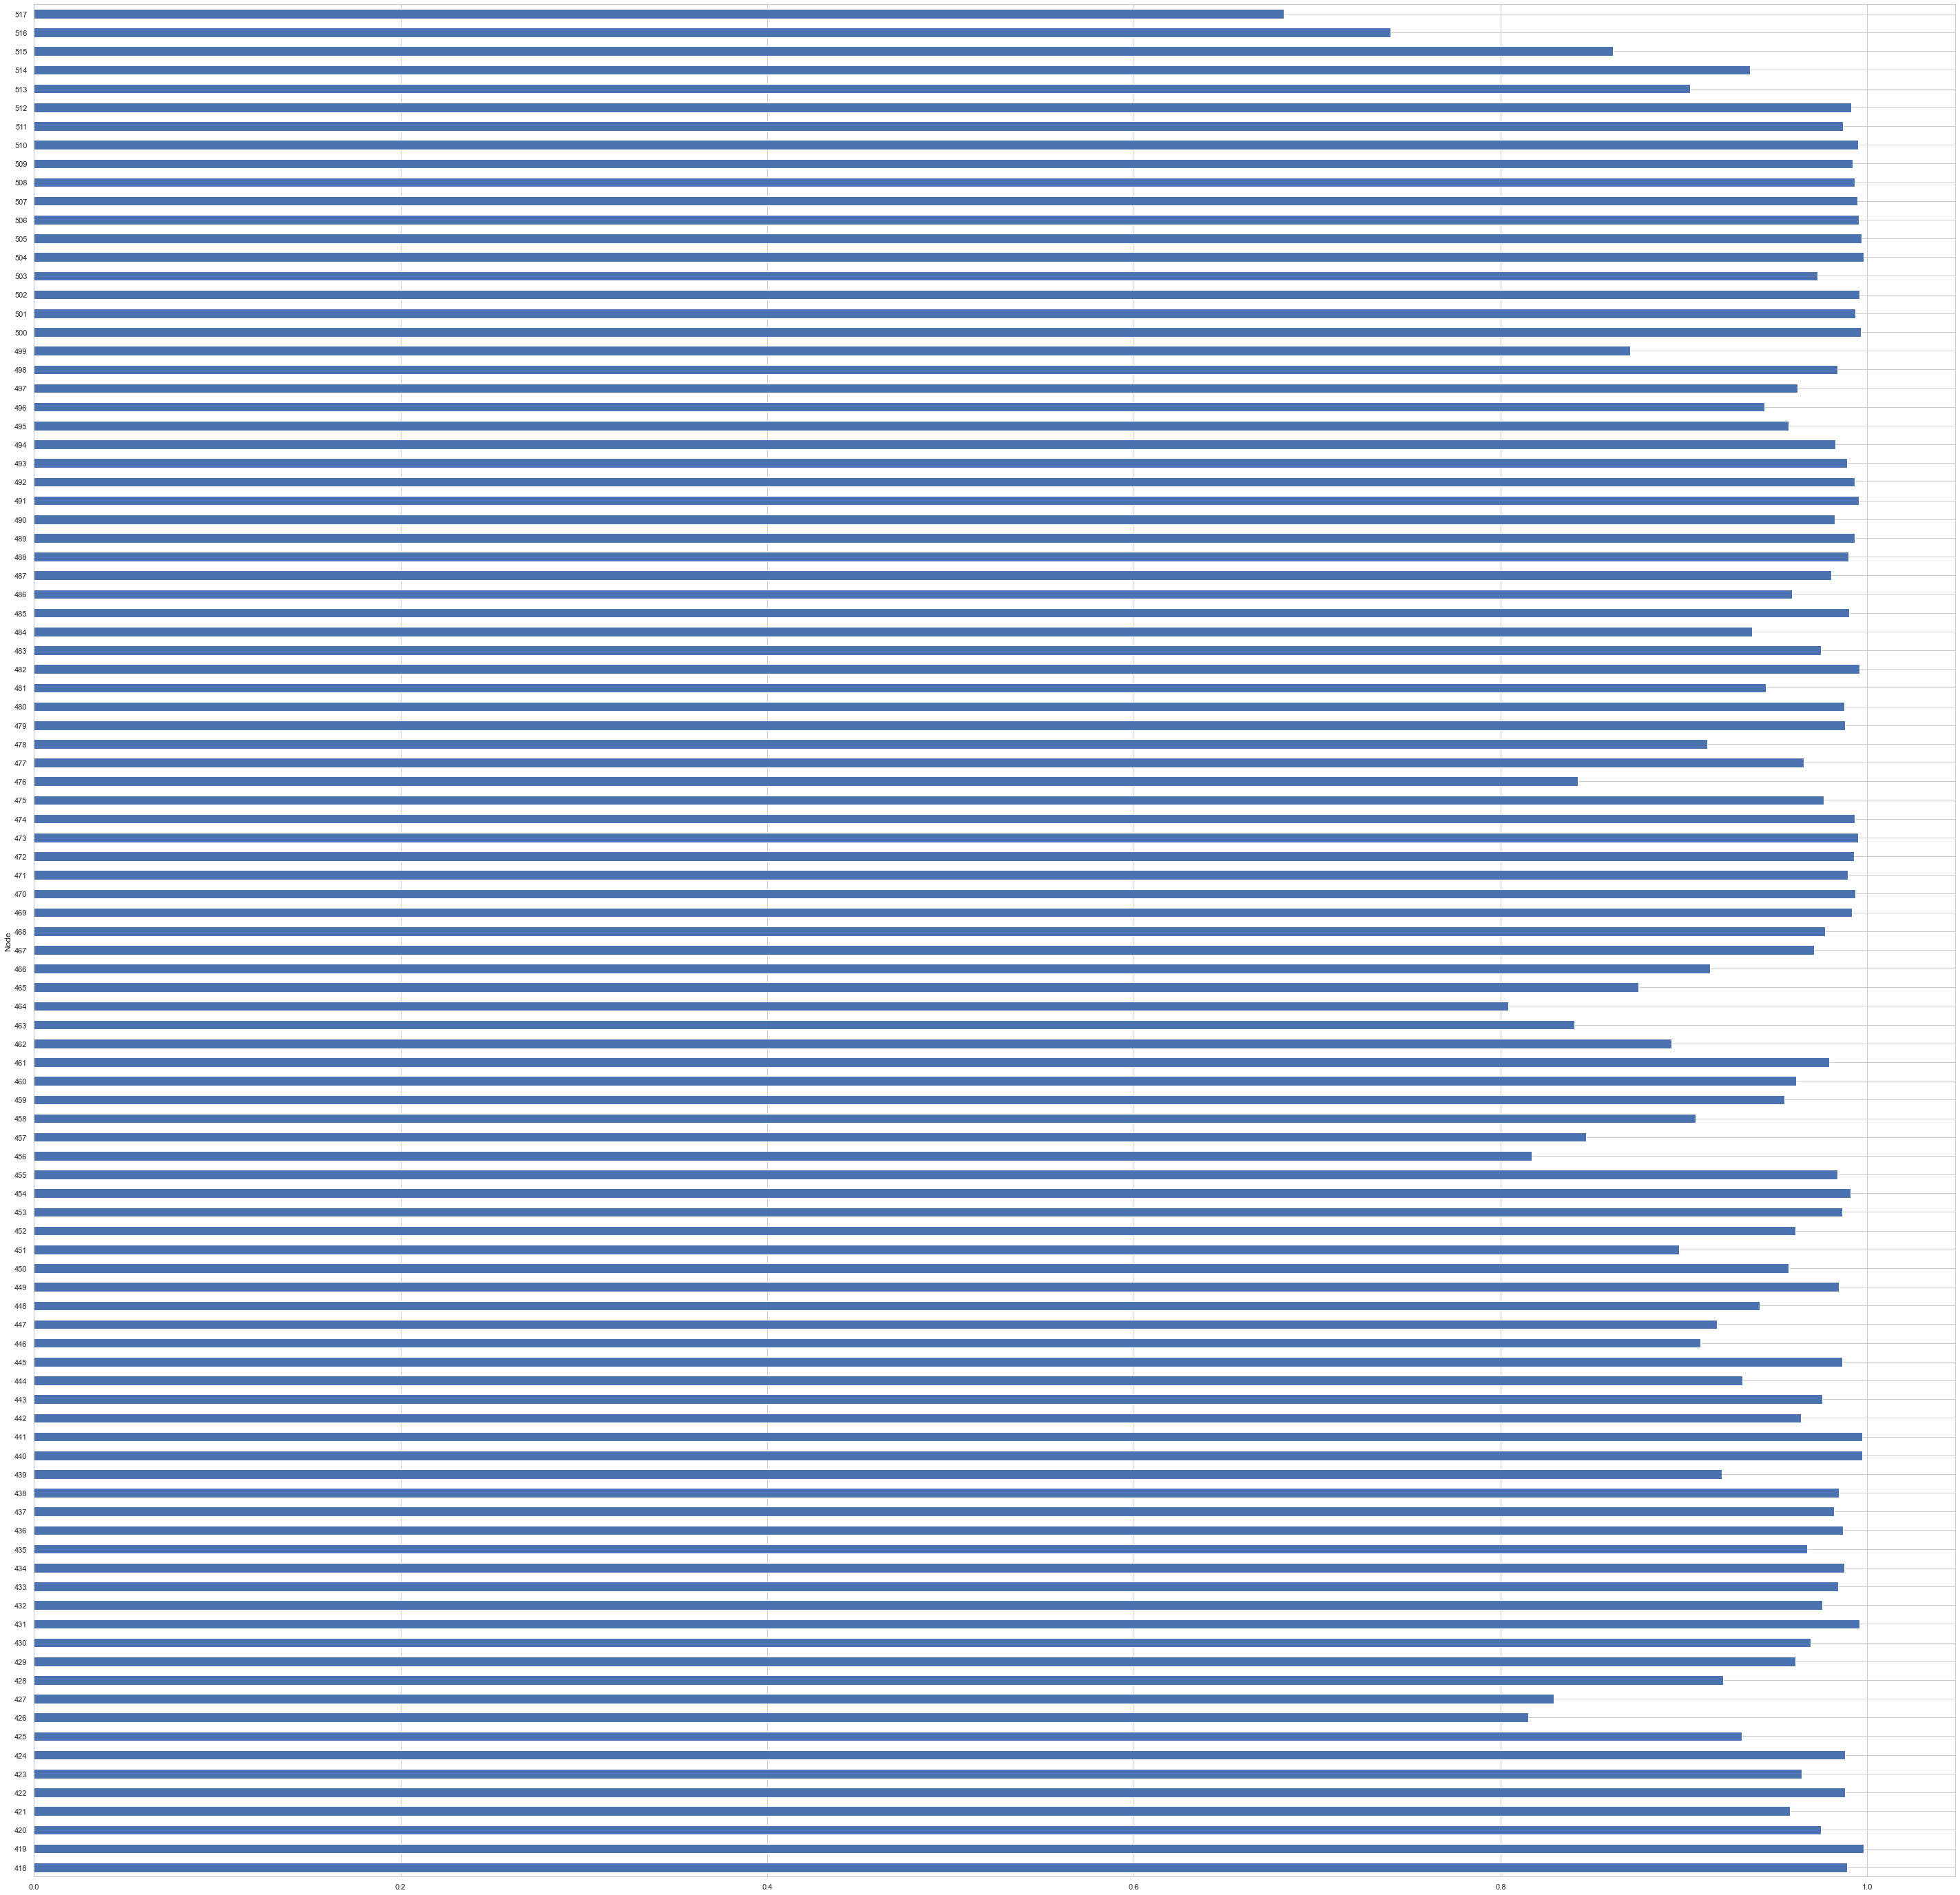

In [39]:
corrs2.iloc[400:500].plot(kind='barh')

<AxesSubplot:ylabel='Node'>

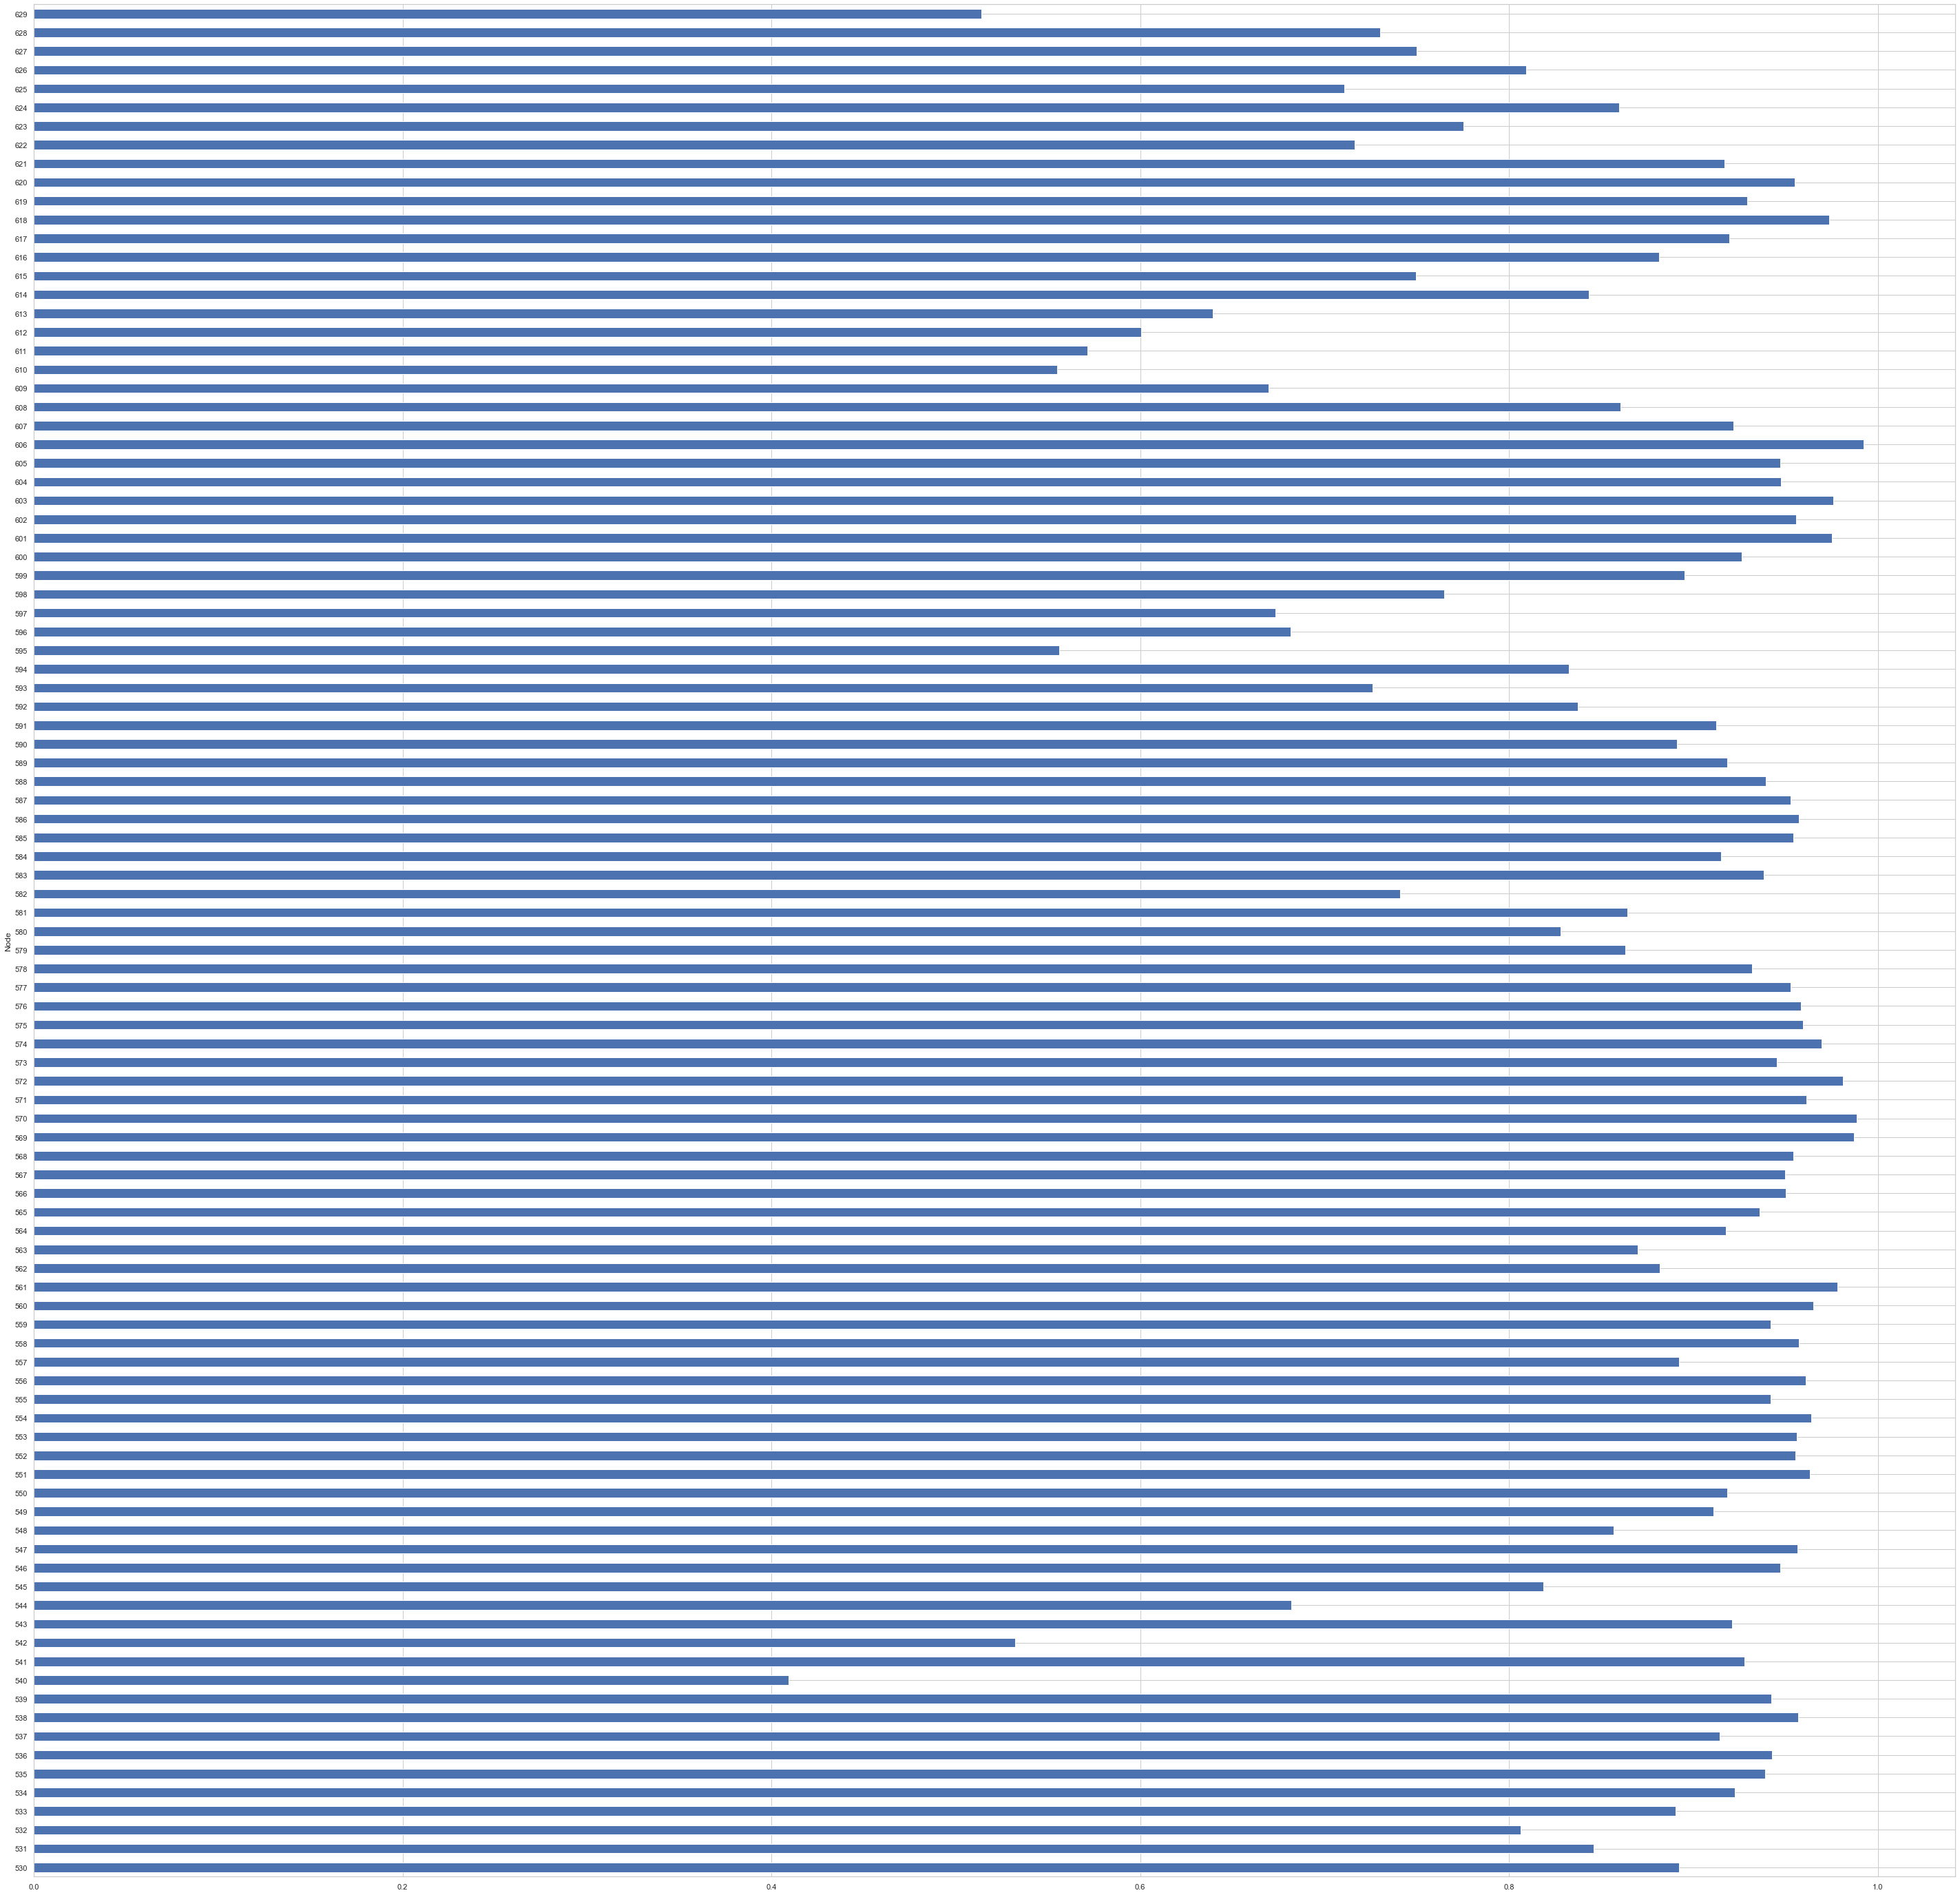

In [40]:
corrs.iloc[500:600].plot(kind='barh')

<AxesSubplot:ylabel='Node'>

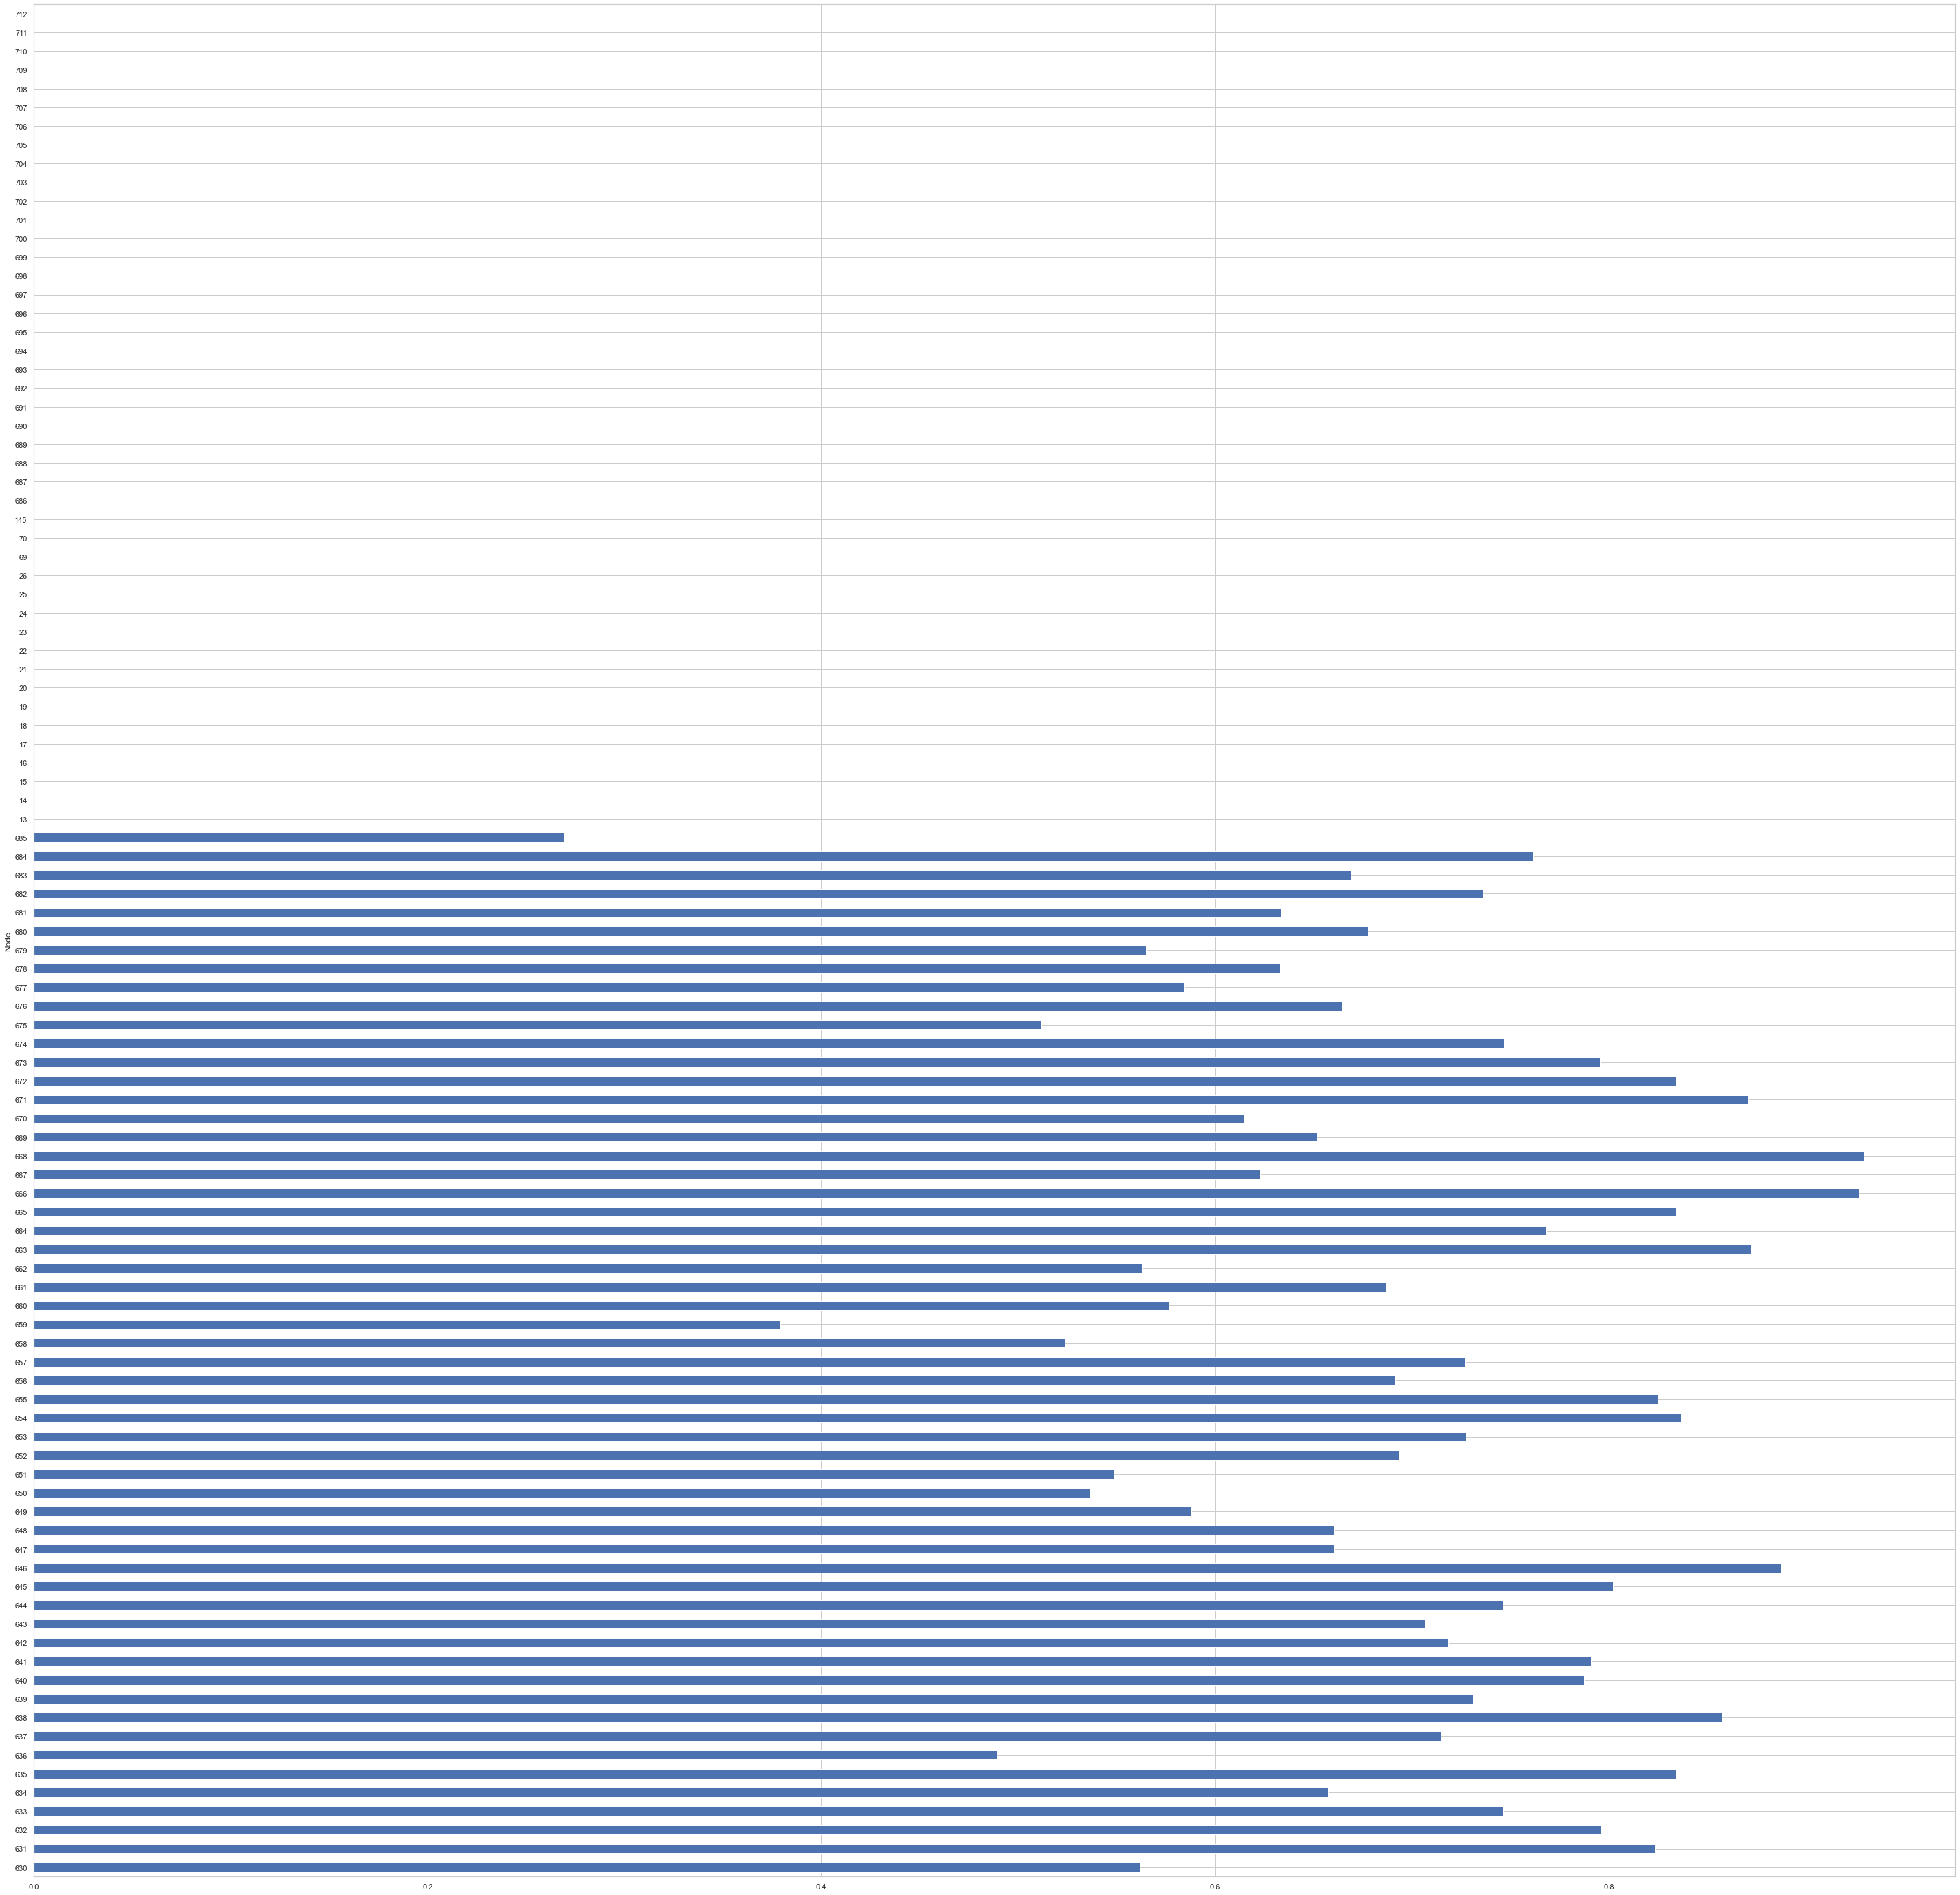

In [41]:
corrs.iloc[600:700].plot(kind='barh')

In [42]:
%store omicron2

Stored 'omicron2' (DataFrame)
